In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means,KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("sales_data_sample.csv",encoding="latin")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.shape

(2823, 25)

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df.drop(["ADDRESSLINE2","STATE","TERRITORY","POSTALCODE"], axis=1,inplace=True)    #removing columns with large number of null values

In [8]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium


In [9]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
CITY                 object
COUNTRY              object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [10]:
df.drop(["ORDERNUMBER","STATUS","CUSTOMERNAME","PHONE","ADDRESSLINE1","CITY","CONTACTLASTNAME","CONTACTFIRSTNAME"],axis=1,inplace=True)

In [11]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [12]:
df["PRODUCTLINE"].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [13]:
df["COUNTRY"].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [14]:
df["DEALSIZE"].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [15]:
productline=pd.get_dummies(df["PRODUCTLINE"])
dealsize=pd.get_dummies(df["DEALSIZE"])

In [16]:
df=pd.concat([df,productline,dealsize],axis=1)

In [17]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0


In [18]:
df.drop(["PRODUCTLINE","COUNTRY","DEALSIZE"],axis=1,inplace=True)

In [19]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,95,S10_1678,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,95,S10_1678,0,1,0,0,0,0,0,0,1,0


In [20]:
df["PRODUCTCODE"]=pd.Categorical(df["PRODUCTCODE"]).codes
df["PRODUCTCODE"]

0         0
1         0
2         0
3         0
4         0
       ... 
2818    108
2819    108
2820    108
2821    108
2822    108
Name: PRODUCTCODE, Length: 2823, dtype: int8

In [21]:
df.drop(["ORDERDATE"],axis=1,inplace=True)

In [22]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,0,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,0,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,0,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,1,0,0,0,0,0,0,1,0


In [23]:
df.dtypes

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains                uint8
Trucks and Buses      uint8
Vintage Cars          uint8
Large                 uint8
Medium                uint8
Small                 uint8
dtype: object

In [24]:
l=[]
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(df)
    print(model)
    l.append(model.inertia_)
print(l)
# Inertia is a measure of how internally coherent the clusters are. 
# It is calculated as the sum of squared distances from each point to its assigned cluster center.

# The goal of K-Means clustering is to minimize inertia. When you increase the number of clusters, 
# the inertia tends to decrease because clusters become smaller and data points are closer to their cluster centers. 
# However, there is a point where adding more clusters doesn't significantly reduce inertia, 
# and it starts to level off. This point is often referred to as the "elbow" in the inertia plot.

KMeans(n_clusters=1)
KMeans(n_clusters=2)
KMeans(n_clusters=3)
KMeans(n_clusters=4)
KMeans(n_clusters=5)
KMeans(n_clusters=6)
KMeans(n_clusters=7)
KMeans()
KMeans(n_clusters=9)
[9582428844.482006, 3328551073.7752357, 1735195306.3131452, 1045733764.8786544, 717920895.072335, 516697746.25070816, 389520181.27996117, 300644771.5910085, 236778702.81376243]


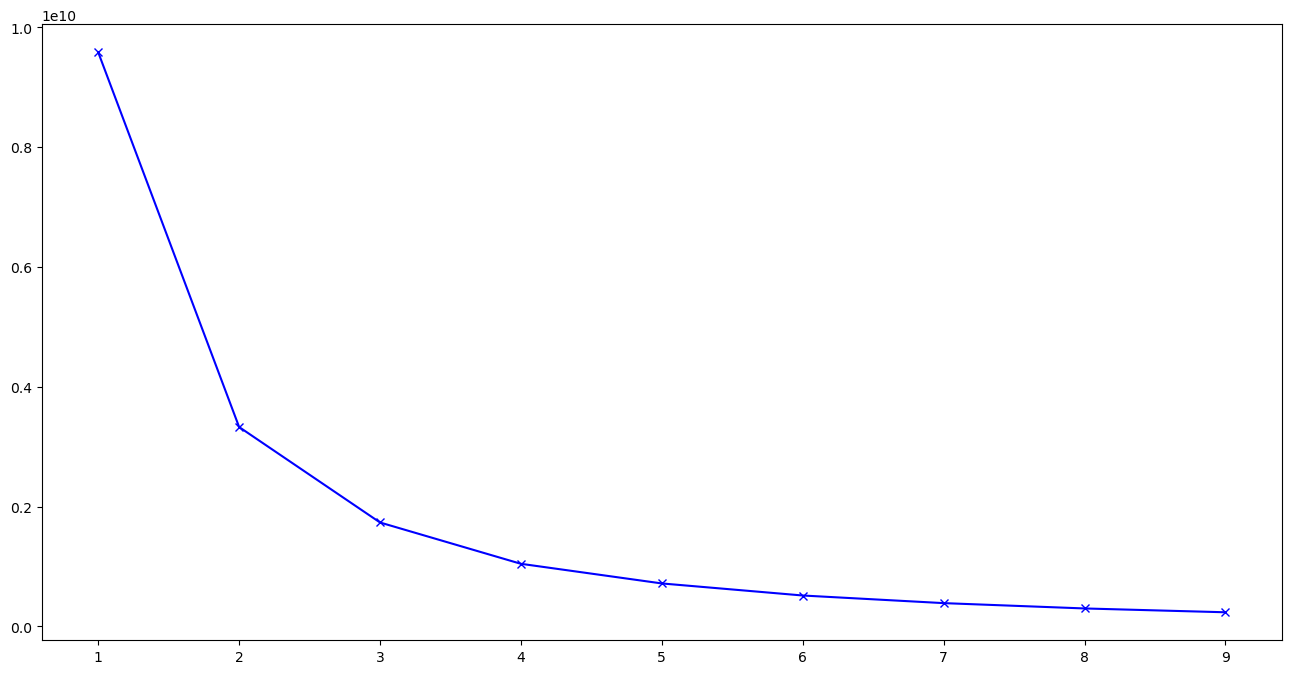

In [25]:
plt.figure(figsize=(16,8))
plt.plot(range(1,10),l,"bx-")

In [26]:
x_train=df.values

In [27]:
x_train.shape

(2823, 19)

In [28]:
model=KMeans(n_clusters=3,random_state=2)
model.fit(x_train)
predictions=model.predict(x_train)
predictions

array([1, 1, 0, ..., 0, 1, 1])

In [29]:
unique,counts=np.unique(predictions, return_counts=True)
print(unique)
print(counts)

[0 1 2]
[1083 1367  373]


In [30]:
pca=PCA(n_components=2)
pca_data=pca.fit_transform(x_train)

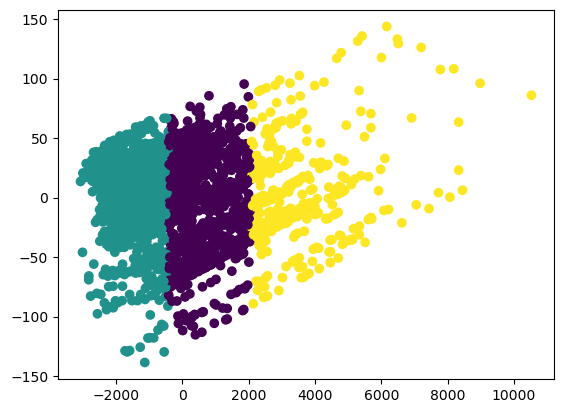

In [31]:
cluster_labels=model.labels_
plt.scatter(pca_data[:,0],pca_data[:,1],c=cluster_labels)